Entrenamiento de Modelo de Aprendizaje superficial

In [5]:
# Este Fragmento permite importar las librerias necesarias 

# Librerias generales para procesamiento de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias de sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# Validación cruzada estratificada completa con mejores hiperparámetros
from sklearn.model_selection import cross_val_score

In [ ]:
# Este fragmento permite cargar el dataset de métricas simples

# Cargar dataset de métricas simples
df = pd.read_csv("out/metrics.csv")
# Mostrar las primeras filas del dataframe
df.head()

,Mote id,distancia,success_rate,loss_count,varianza,longest_loss_streak
0,Mote1,20,0.941333,176,0.055243,28
1,Mote2,20,0.888000,336,0.099489,80
2,Mote3,20,1.000000,0,0.000000,0
3,Mote4,20,0.396333,1811,0.239333,144
4,Mote5,20,0.873667,379,0.110410,86


In [7]:
# Separar features y etiqueta
X = df[['success_rate', 'loss_count', 'varianza', 'longest_loss_streak']]
y = df['distancia']

# Dividir en Train (60%), Test para GridSearch (20%), Validation final (20%)
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Resultado aprox: 60% train, 20% test, 20% validation
X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

=== Reporte de clasificación en VALIDATION ===
              precision    recall  f1-score   support

          20       0.50      0.50      0.50         6
          25       0.50      0.50      0.50         6

    accuracy                           0.50        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.50      0.50      0.50        12



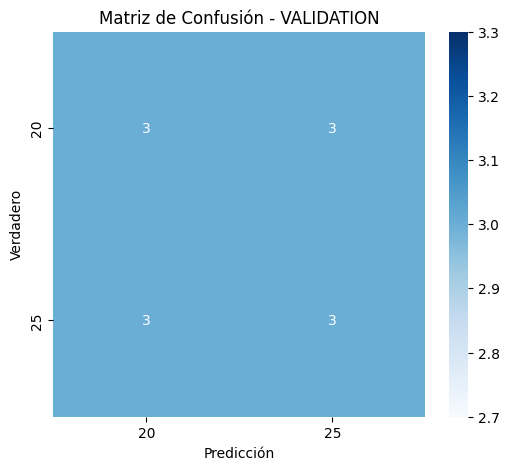

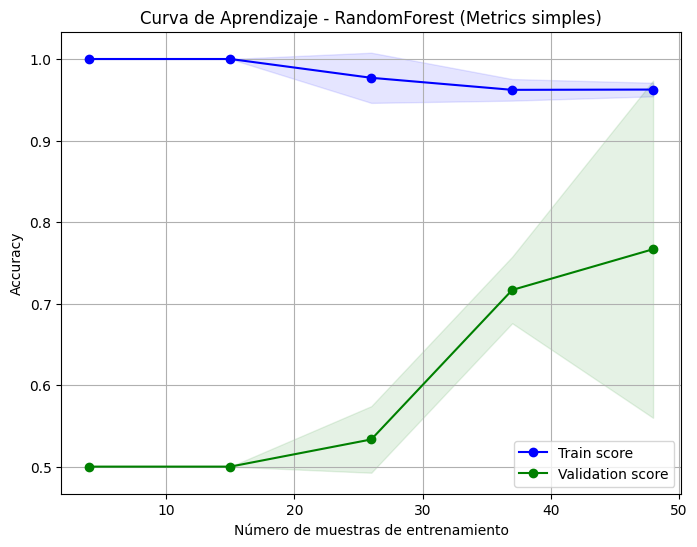


Scores finales en VALIDATION:
Accuracy: 0.500
F1-score (macro): 0.500
F1-score (weighted): 0.500
Accuracy promedio CV: 0.767 ± 0.207


In [ ]:
# Ajuste de hiperparámetros usando GridSearchCV sobre TRAIN y TEST
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Entrenamiento con train + CV interno
clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#Entrenar el modelo
grid.fit(X_train, y_train)  

print(f"Mejores hiperparámetros encontrados: {grid.best_params_}")

# Evaluación final en conjunto de VALIDATION
best_clf = grid.best_estimator_
y_val_pred = best_clf.predict(X_val)

print("\n=== Reporte de clasificación en VALIDATION ===")
print(classification_report(y_val, y_val_pred))

# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - VALIDATION")
plt.show()

# Curva de aprendizaje usando VALIDATION para visualización
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    best_clf, X, y, cv=cv_outer, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)


# Calcular medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title("Curva de Aprendizaje - RandomForest (Metrics simples)")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Métricas finales en VALIDATION

accuracy_val = accuracy_score(y_val, y_val_pred)
f1_val_macro = f1_score(y_val, y_val_pred, average='macro')
f1_val_weighted = f1_score(y_val, y_val_pred, average='weighted')

print("\nScores finales en VALIDATION:")
print(f"Accuracy: {accuracy_val:.3f}")
print(f"F1-score (macro): {f1_val_macro:.3f}")
print(f"F1-score (weighted): {f1_val_weighted:.3f}")

# Validación cruzada estratificada completa con mejores hiperparámetros
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_clf, X, y, cv=cv_outer, scoring='accuracy')
print(f"Accuracy promedio CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")


Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

=== Reporte de clasificación en VALIDATION ===
              precision    recall  f1-score   support

          20       1.00      1.00      1.00         6
          25       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



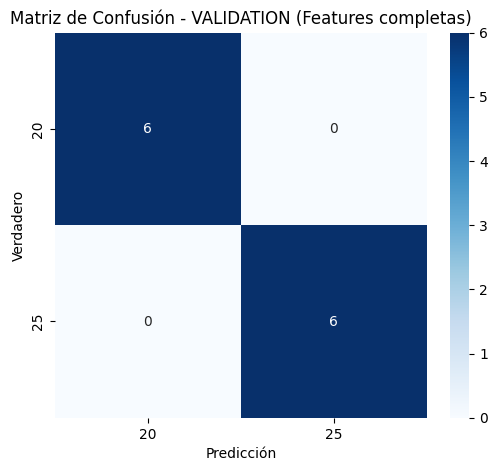

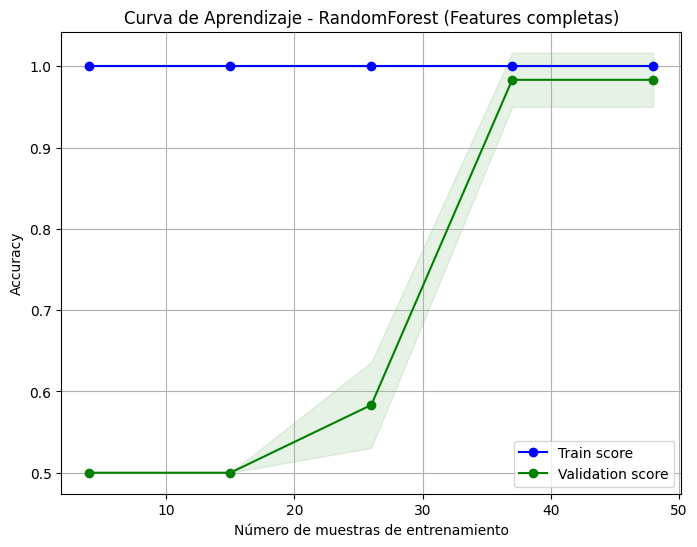


📊 Scores finales en VALIDATION:
Accuracy: 1.000
F1-score (macro): 1.000
F1-score (weighted): 1.000

🎯 Accuracy promedio CV: 0.983 ± 0.033


In [ ]:
# Este fragmento permite cargar el dataset de features complejas
# permite comparar resultados con el dataset de métricas simples
# El script sigue los mismos pasos que el anterior agrugados en un solo script

# Cargar dataset de features complejas
df = pd.read_csv("out/features.csv")

# Separar features y etiqueta
y = df['distancia']
X = df.drop(columns=['distancia'])

# Dividir en Train/Test/Validation (aprox 60/20/20)
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aproximadamente 60% train, 20% test, 20% validation

X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full
)

# GridSearch para ajuste de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

clf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros encontrados: {grid.best_params_}")

# Evaluación final en conjunto de VALIDATION
best_clf = grid.best_estimator_
y_val_pred = best_clf.predict(X_val)

print("\n=== Reporte de clasificación en VALIDATION ===")
print(classification_report(y_val, y_val_pred))

# Matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - VALIDATION (Features completas)")
plt.show()

# Curva de aprendizaje
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    best_clf, X, y, cv=cv_outer, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Calcular medias y desviaciones estándar

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title("Curva de Aprendizaje - RandomForest (Features completas)")
plt.xlabel("Número de muestras de entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Scores finales sobre VALIDATION
accuracy_val = accuracy_score(y_val, y_val_pred)
f1_val_macro = f1_score(y_val, y_val_pred, average='macro')
f1_val_weighted = f1_score(y_val, y_val_pred, average='weighted')

print(f"\n Scores finales en VALIDATION:")
print(f"Accuracy: {accuracy_val:.3f}")
print(f"F1-score (macro): {f1_val_macro:.3f}")
print(f"F1-score (weighted): {f1_val_weighted:.3f}")

# Validación cruzada estratificada completa con mejores hiperparámetros
cv_scores = cross_val_score(best_clf, X, y, cv=cv_outer, scoring='accuracy')
print(f"\n Accuracy promedio CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
